In [1]:
import os
import pegasus as pg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def my_violin(data, level_ord, palette=None):
    fig = pg.violin(
        data, 
        attrs=['n_genes', 'n_counts', 'percent_mito'], 
        groupby='sample', 
        inner='box', 
        palette=palette, 
        panel_size=(len(level_ord)*2, 2), 
        return_fig=True
    )
    return fig

In [2]:
data = pg.read_input("data/lung_final.h5ad")
data

2021-04-05 15:37:44,164 - pegasusio.readwrite - INFO - h5ad file 'data/lung_final.h5ad' is loaded.
2021-04-05 15:37:44,174 - pegasusio.readwrite - INFO - Function 'read_input' finished in 10.35s.


MultimodalData object with 1 UnimodalData: 'unknown-rna'
    It currently binds to UnimodalData object unknown-rna

UnimodalData object with n_obs x n_vars = 106792 x 30983
    Genome: unknown; Modality: rna
    It contains 4 matrices: 'X', 'raw.X', 'counts', 'winsorized'
    It currently binds to matrix 'X' as X

    obs: 'sample', 'method', 'donor', 'disease', 'Viral+', 'predictions', 'max_confidence_log', 'compartment', 'SubCluster', 'Cluster', 'leiden_res_2', 'leiden_res_1.3', 'n_genes', 'n_counts', 'percent_mito'
    var: 'featureid'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    uns: 'Cluster_colors', 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap', 'genome', 'modality'

In [3]:
sample_dict = {
    'D3': ['D3_S1', 'D3_S2', 'D3_S3'], # 3' sc, 5' sc, 3' sn
    'D8': ['D8_S2', 'D8_S3', 'D8_S1'], # 3' sc, 5' sc, 3' sn
    'D12': ['D12_S4', 'D12_S1'],       # 3' sc, 3' sn
}

In [4]:
if not os.path.exists("ED_Figure_1"):
    os.mkdir("ED_Figure_1")

## Donor D3

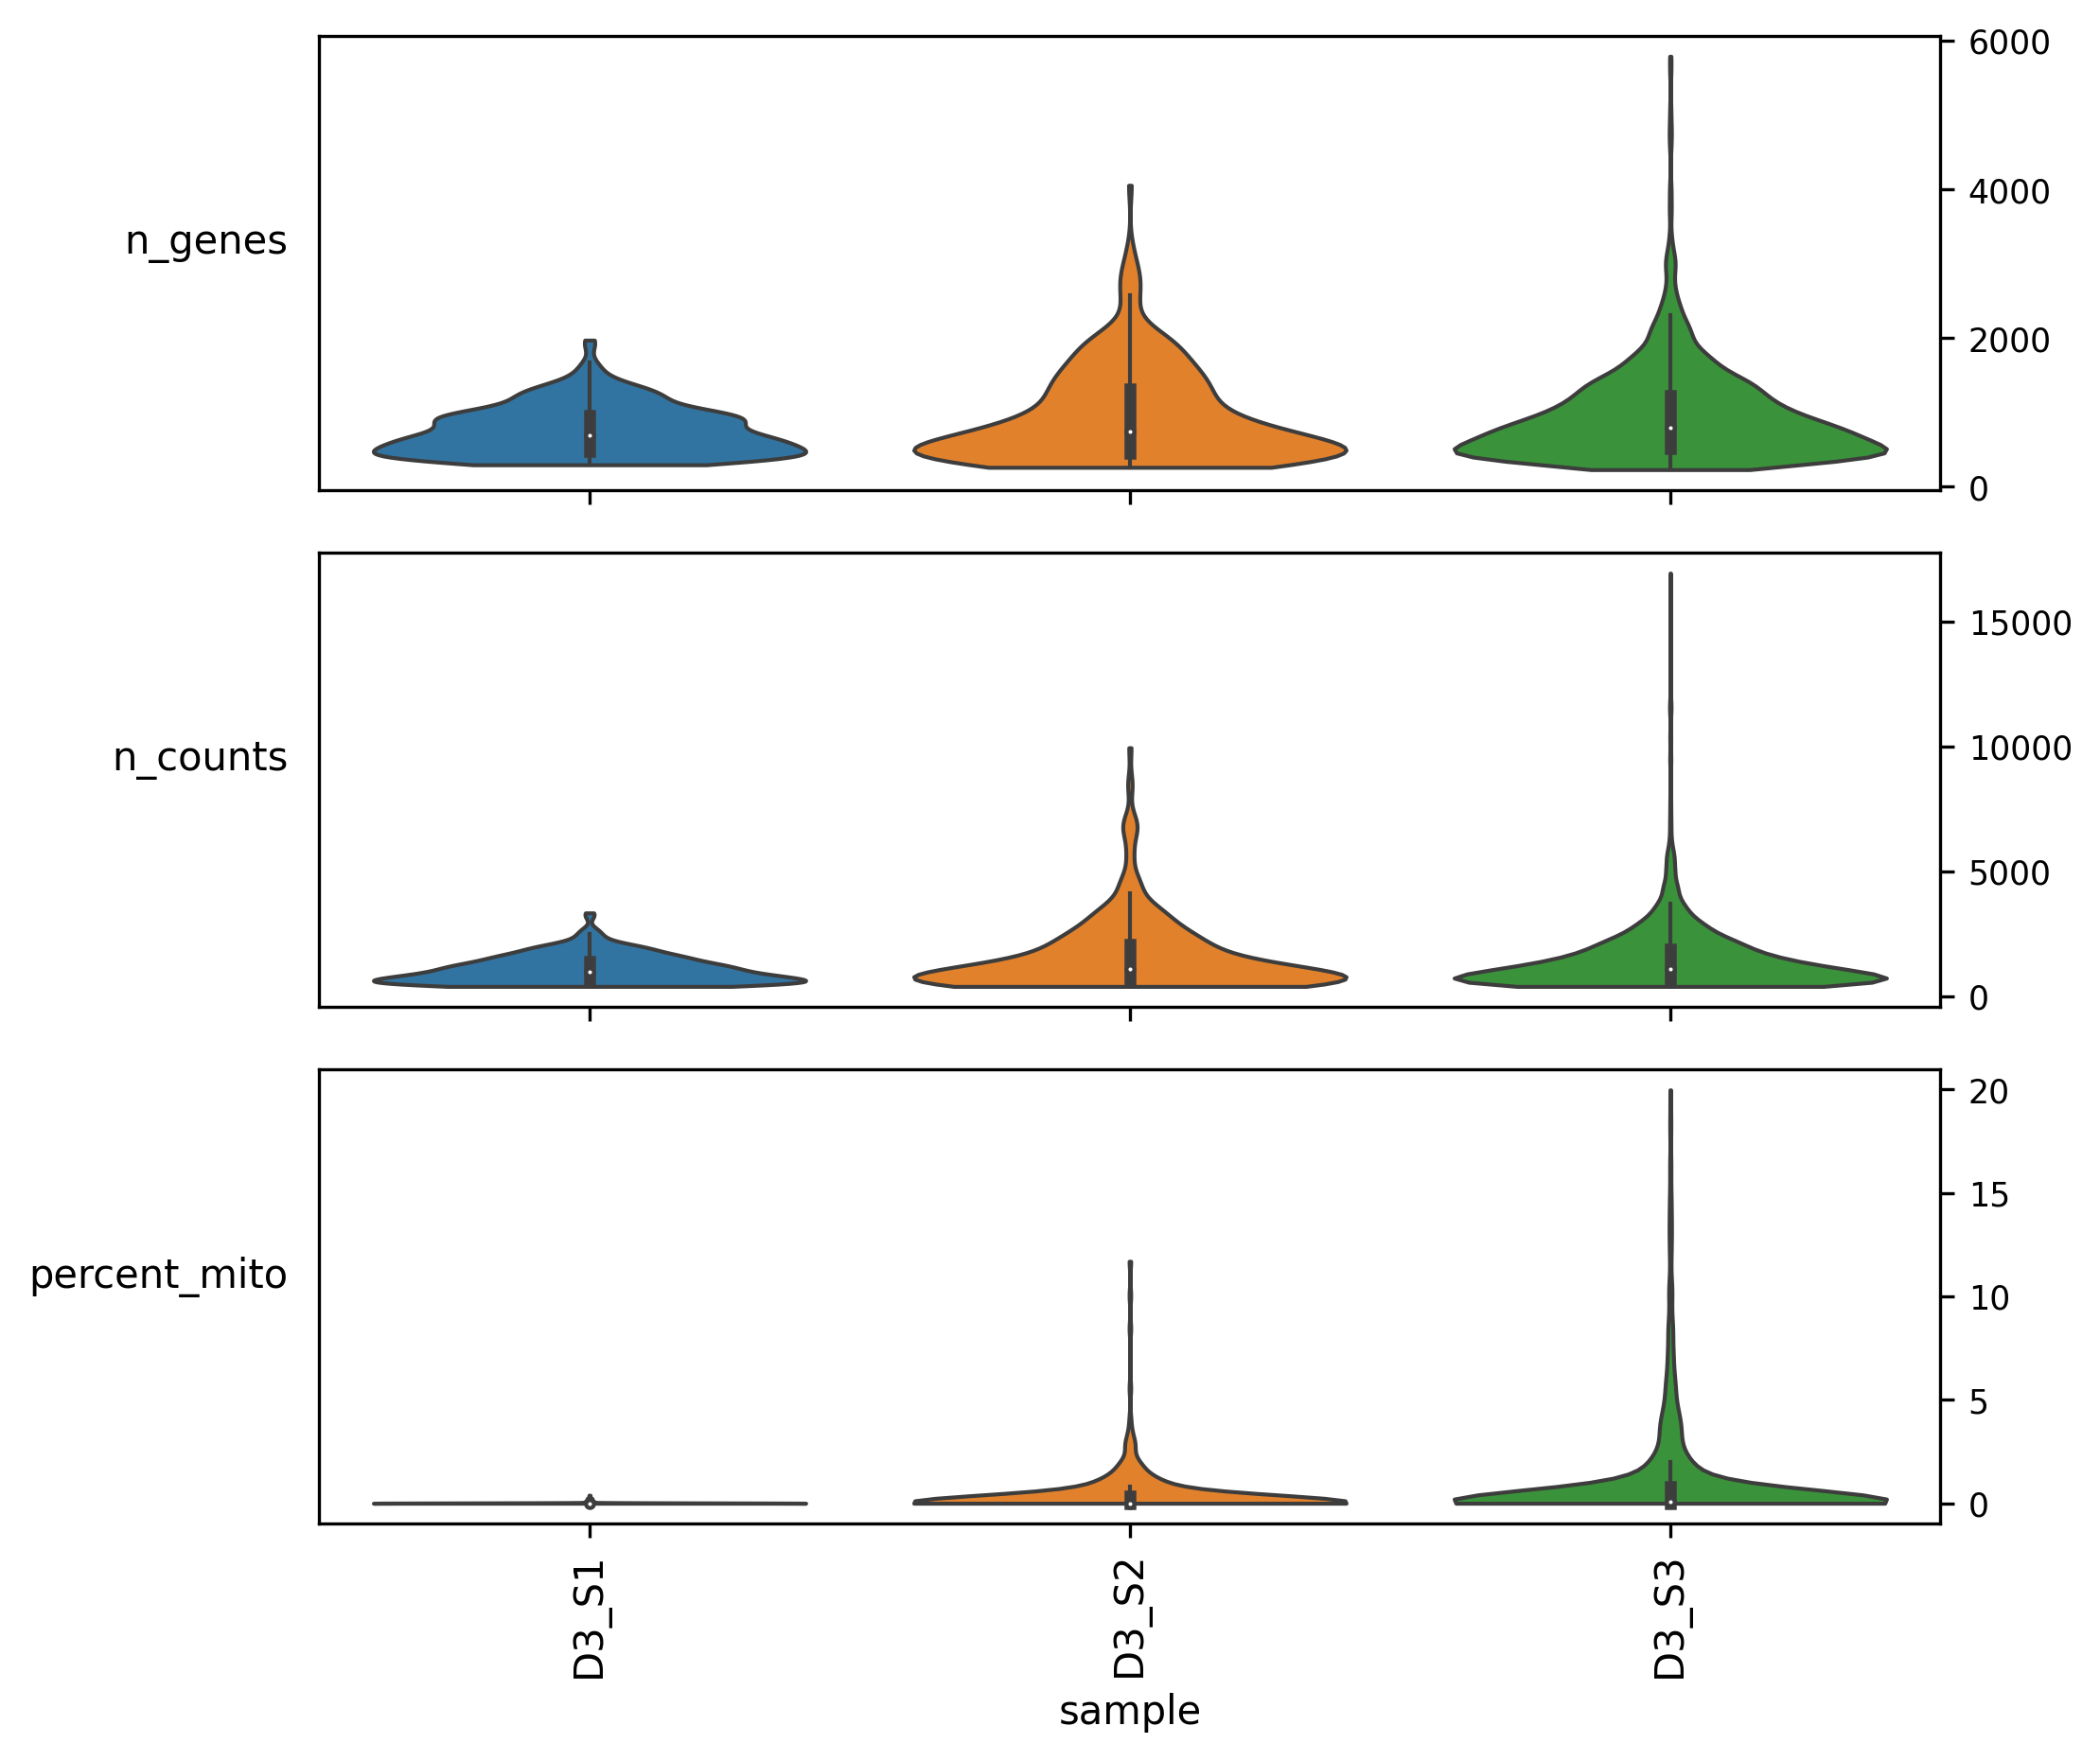

In [5]:
data_d3 = data[data.obs['sample'].isin(sample_dict['D3']), :].copy()
data_d3.obs['sample'] = data_d3.obs['sample'].cat.remove_unused_categories().cat.reorder_categories(sample_dict['D3'])

fig1 = my_violin(data_d3, sample_dict['D3'])
plt.tight_layout()
fig1.savefig("D3_violin.pdf", dpi=300)

In [6]:
data_d3.obs.groupby('sample').median()[['n_genes', 'n_counts', 'percent_mito']]

,n_genes,n_counts,percent_mito
sample,,,
D3_S1,688,966.0,0.000000
D3_S2,741,1096.0,0.000000
D3_S3,792,1107.0,0.085397


/Users/yy939/GitHub/pegasus/pegasus/plotting/plot_library.py:636: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')


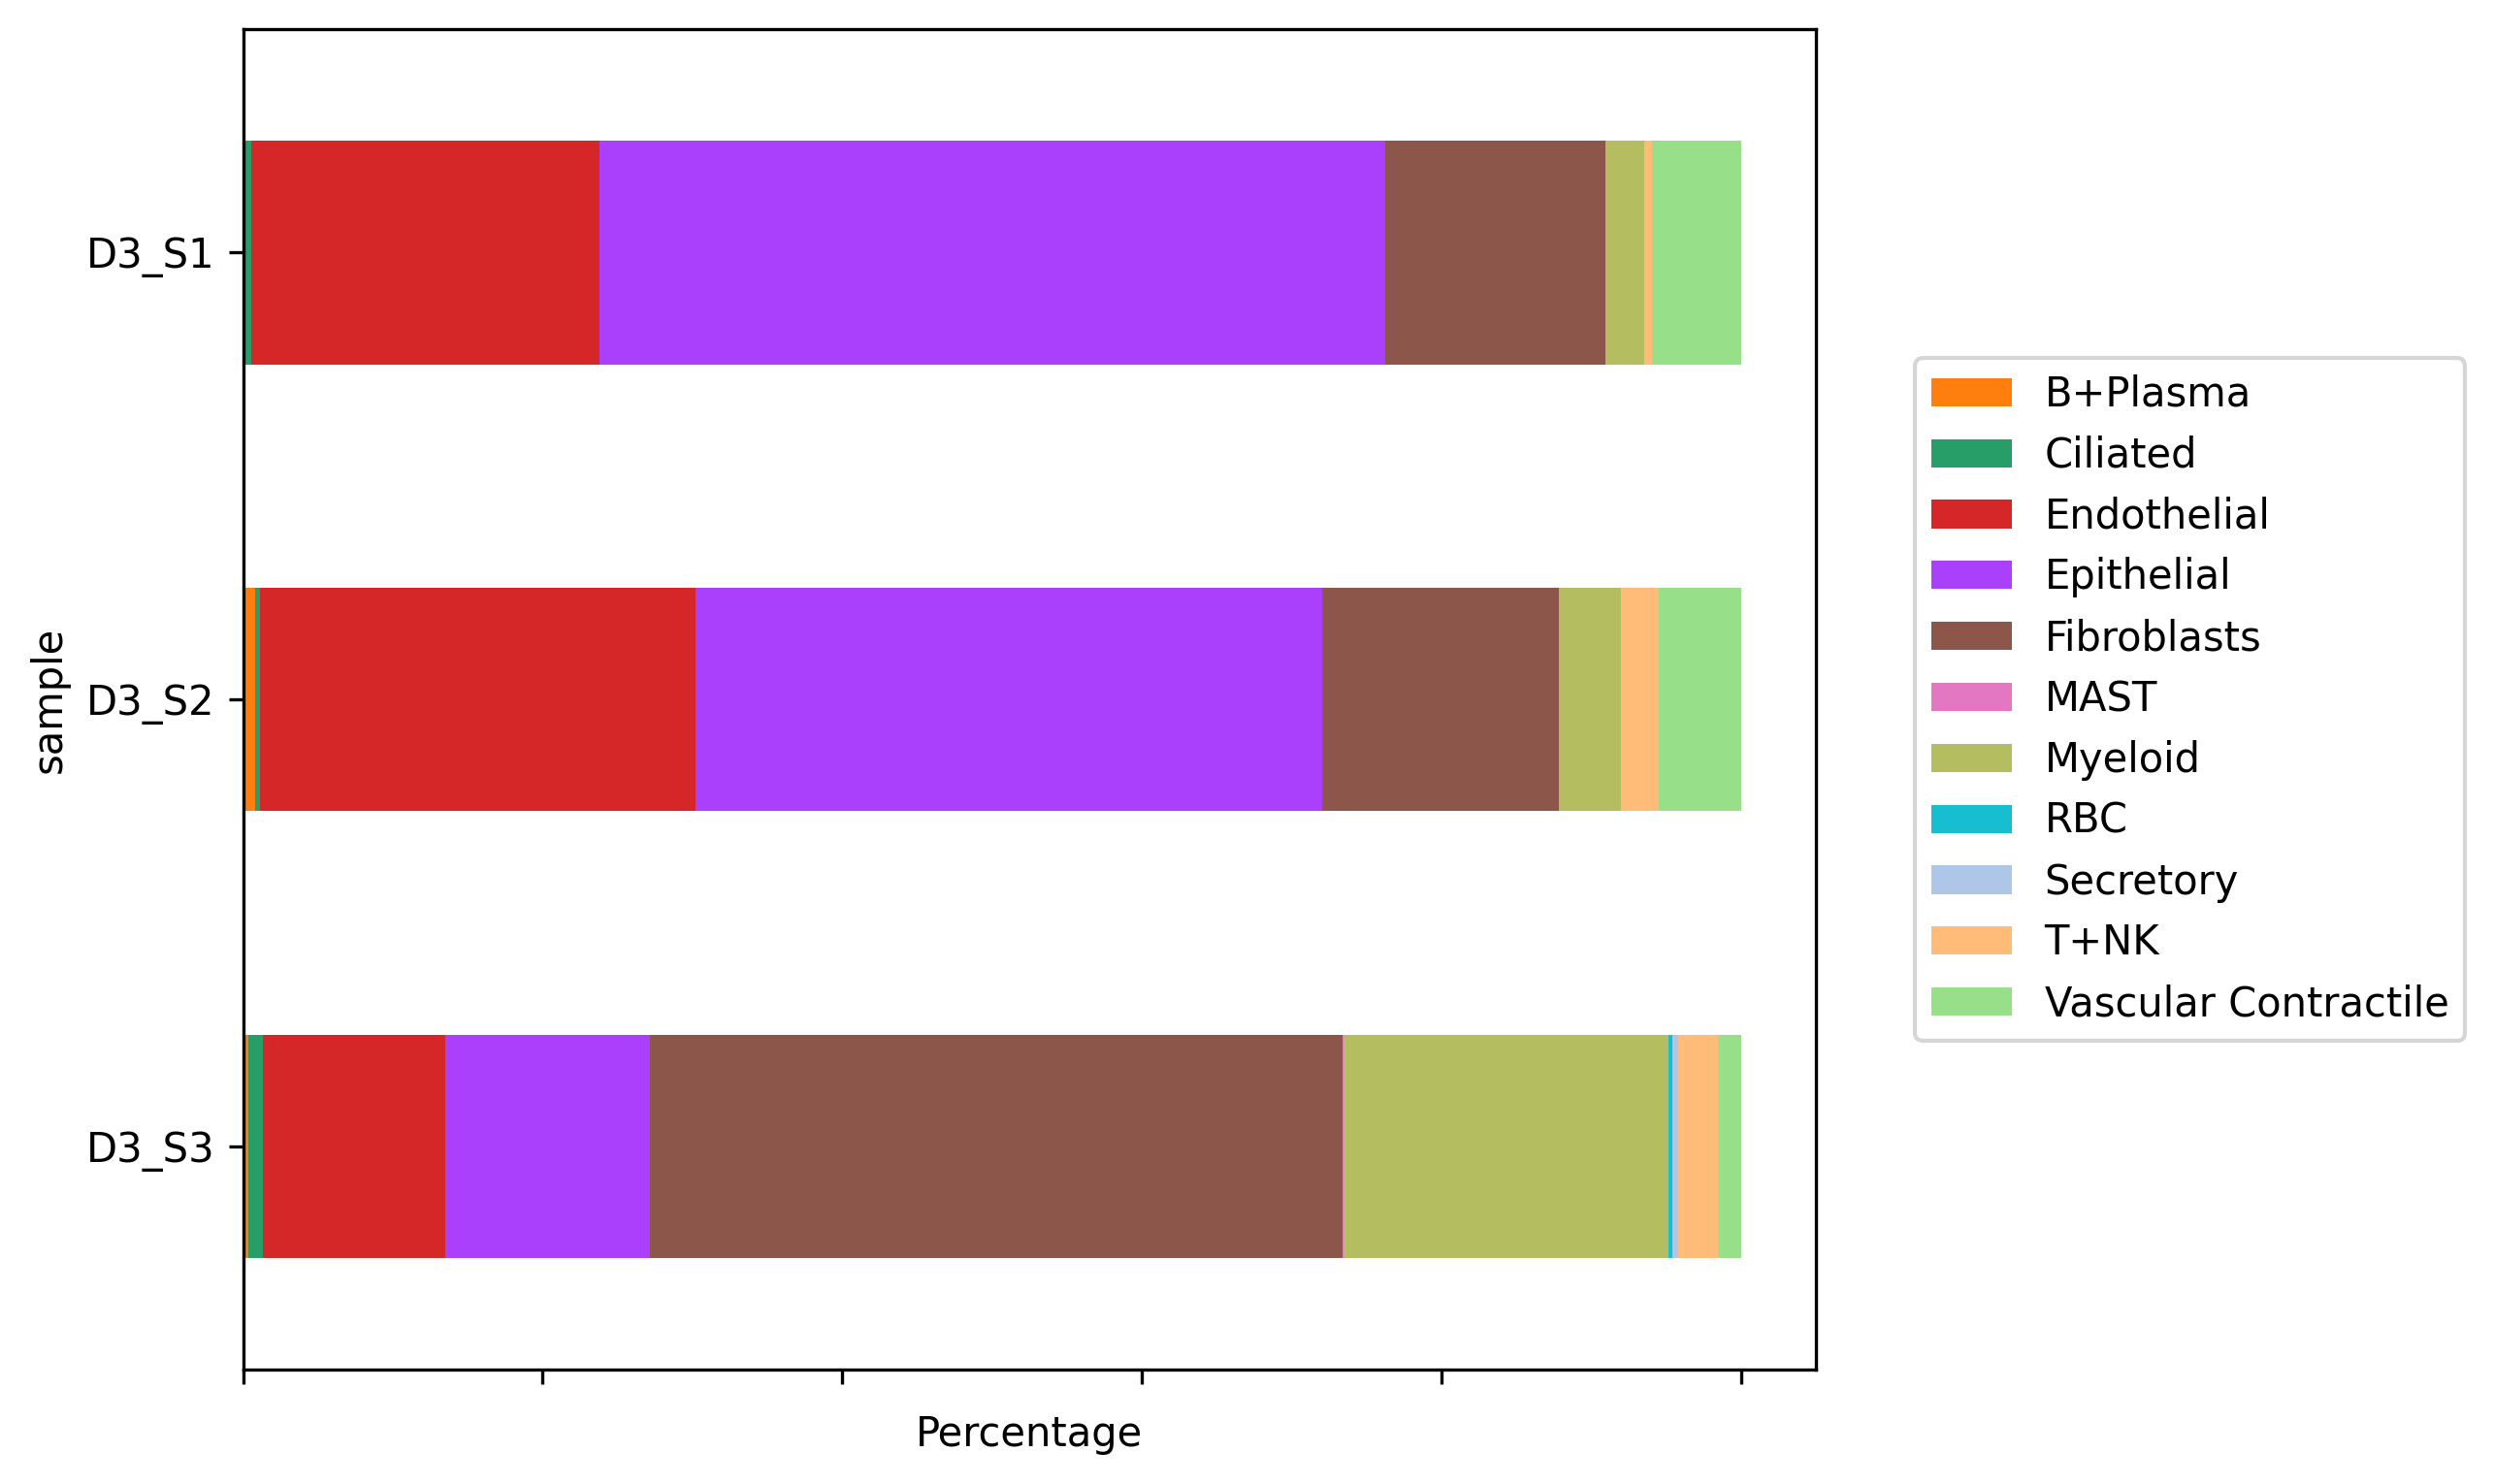

In [7]:
fig2 = pg.compo_plot(data_d3, groupby='sample', condition='Cluster', 
              sort_function=None, switch_axes=True, 
              color_unused=True, palette=data.uns['Cluster_colors'], return_fig=True)
plt.tight_layout()
fig2.savefig("ED_Figure_1/ED_Figure_1f.pdf", dpi=300)

In [8]:
data_d3.obs['sample'].value_counts(sort=False)

D3_S1     387
D3_S2     361
D3_S3    2770
Name: sample, dtype: int64

## Donor D8

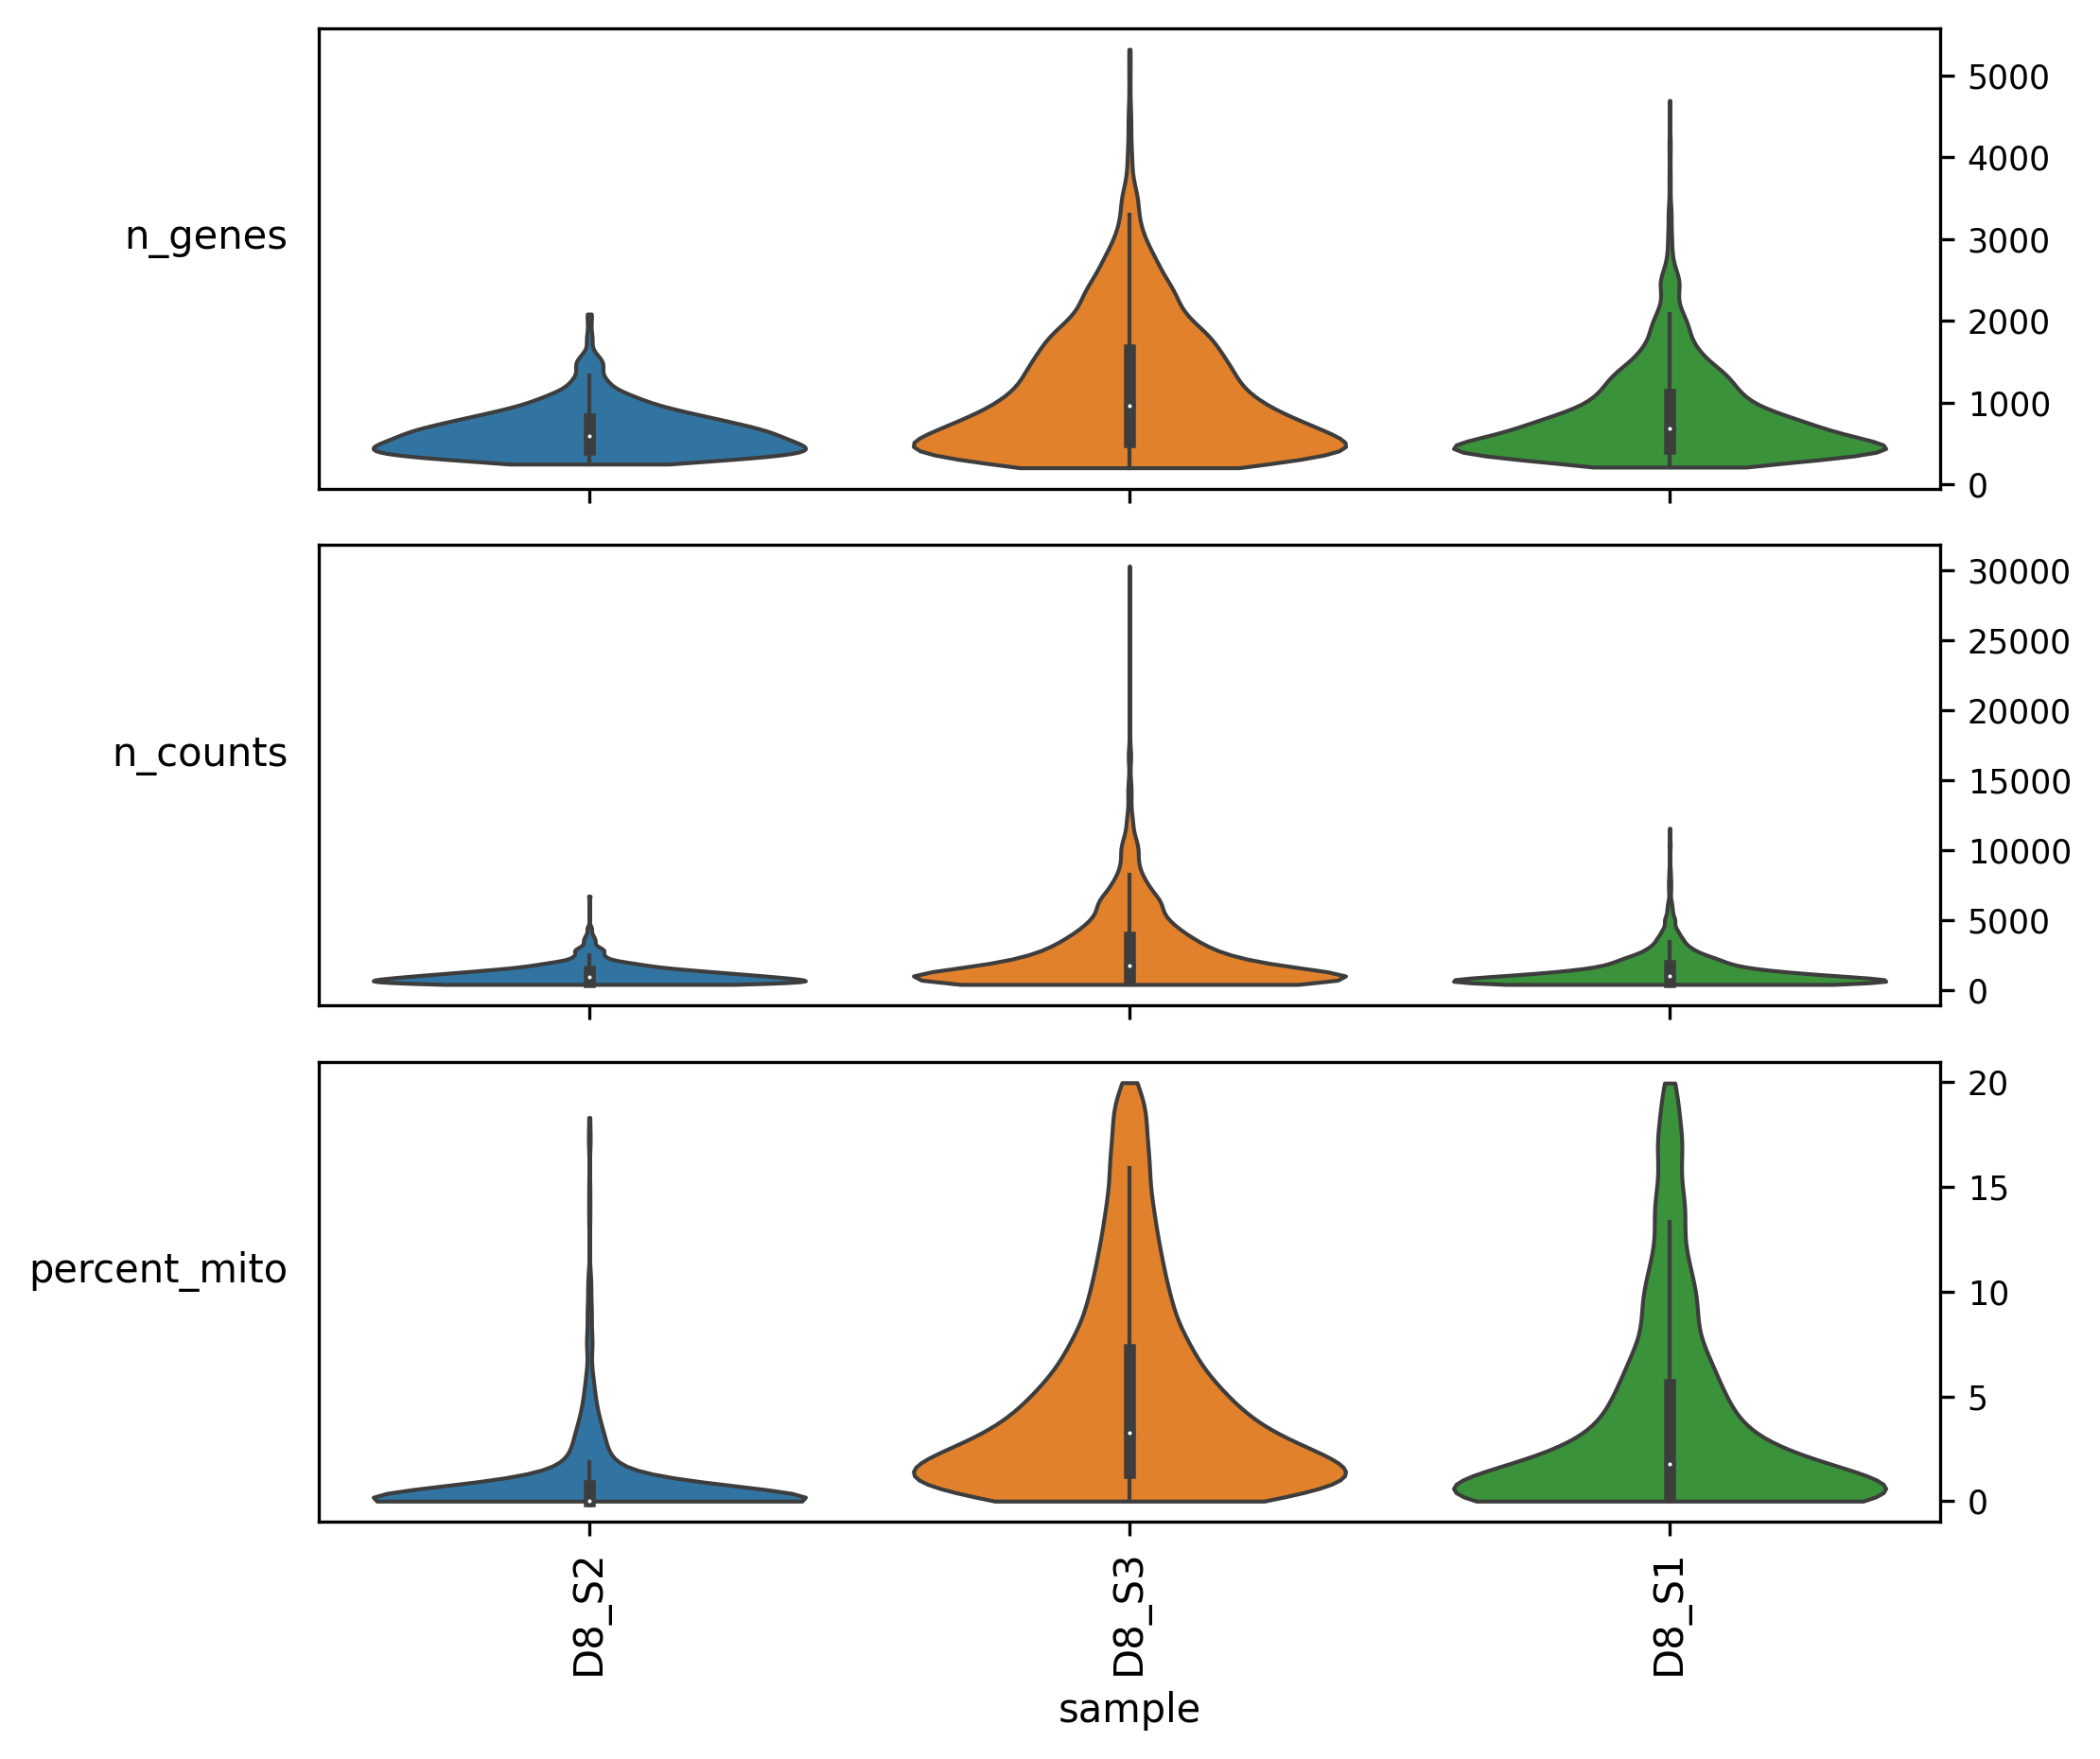

In [9]:
data_d8 = data[data.obs['sample'].isin(sample_dict['D8']), :].copy()
data_d8.obs['sample'] = data_d8.obs['sample'].cat.remove_unused_categories().cat.reorder_categories(sample_dict['D8'])

fig3 = my_violin(data_d8, sample_dict['D8'])
plt.tight_layout()
fig3.savefig("D8_violin.pdf", dpi=300)

In [10]:
data_d8.obs.groupby('sample').median()[['n_genes', 'n_counts', 'percent_mito']]

,n_genes,n_counts,percent_mito
sample,,,
D8_S2,589.5,939.0,0.000000
D8_S3,955.5,1759.5,3.283203
D8_S1,678.0,980.5,1.761289


/Users/yy939/GitHub/pegasus/pegasus/plotting/plot_library.py:636: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')


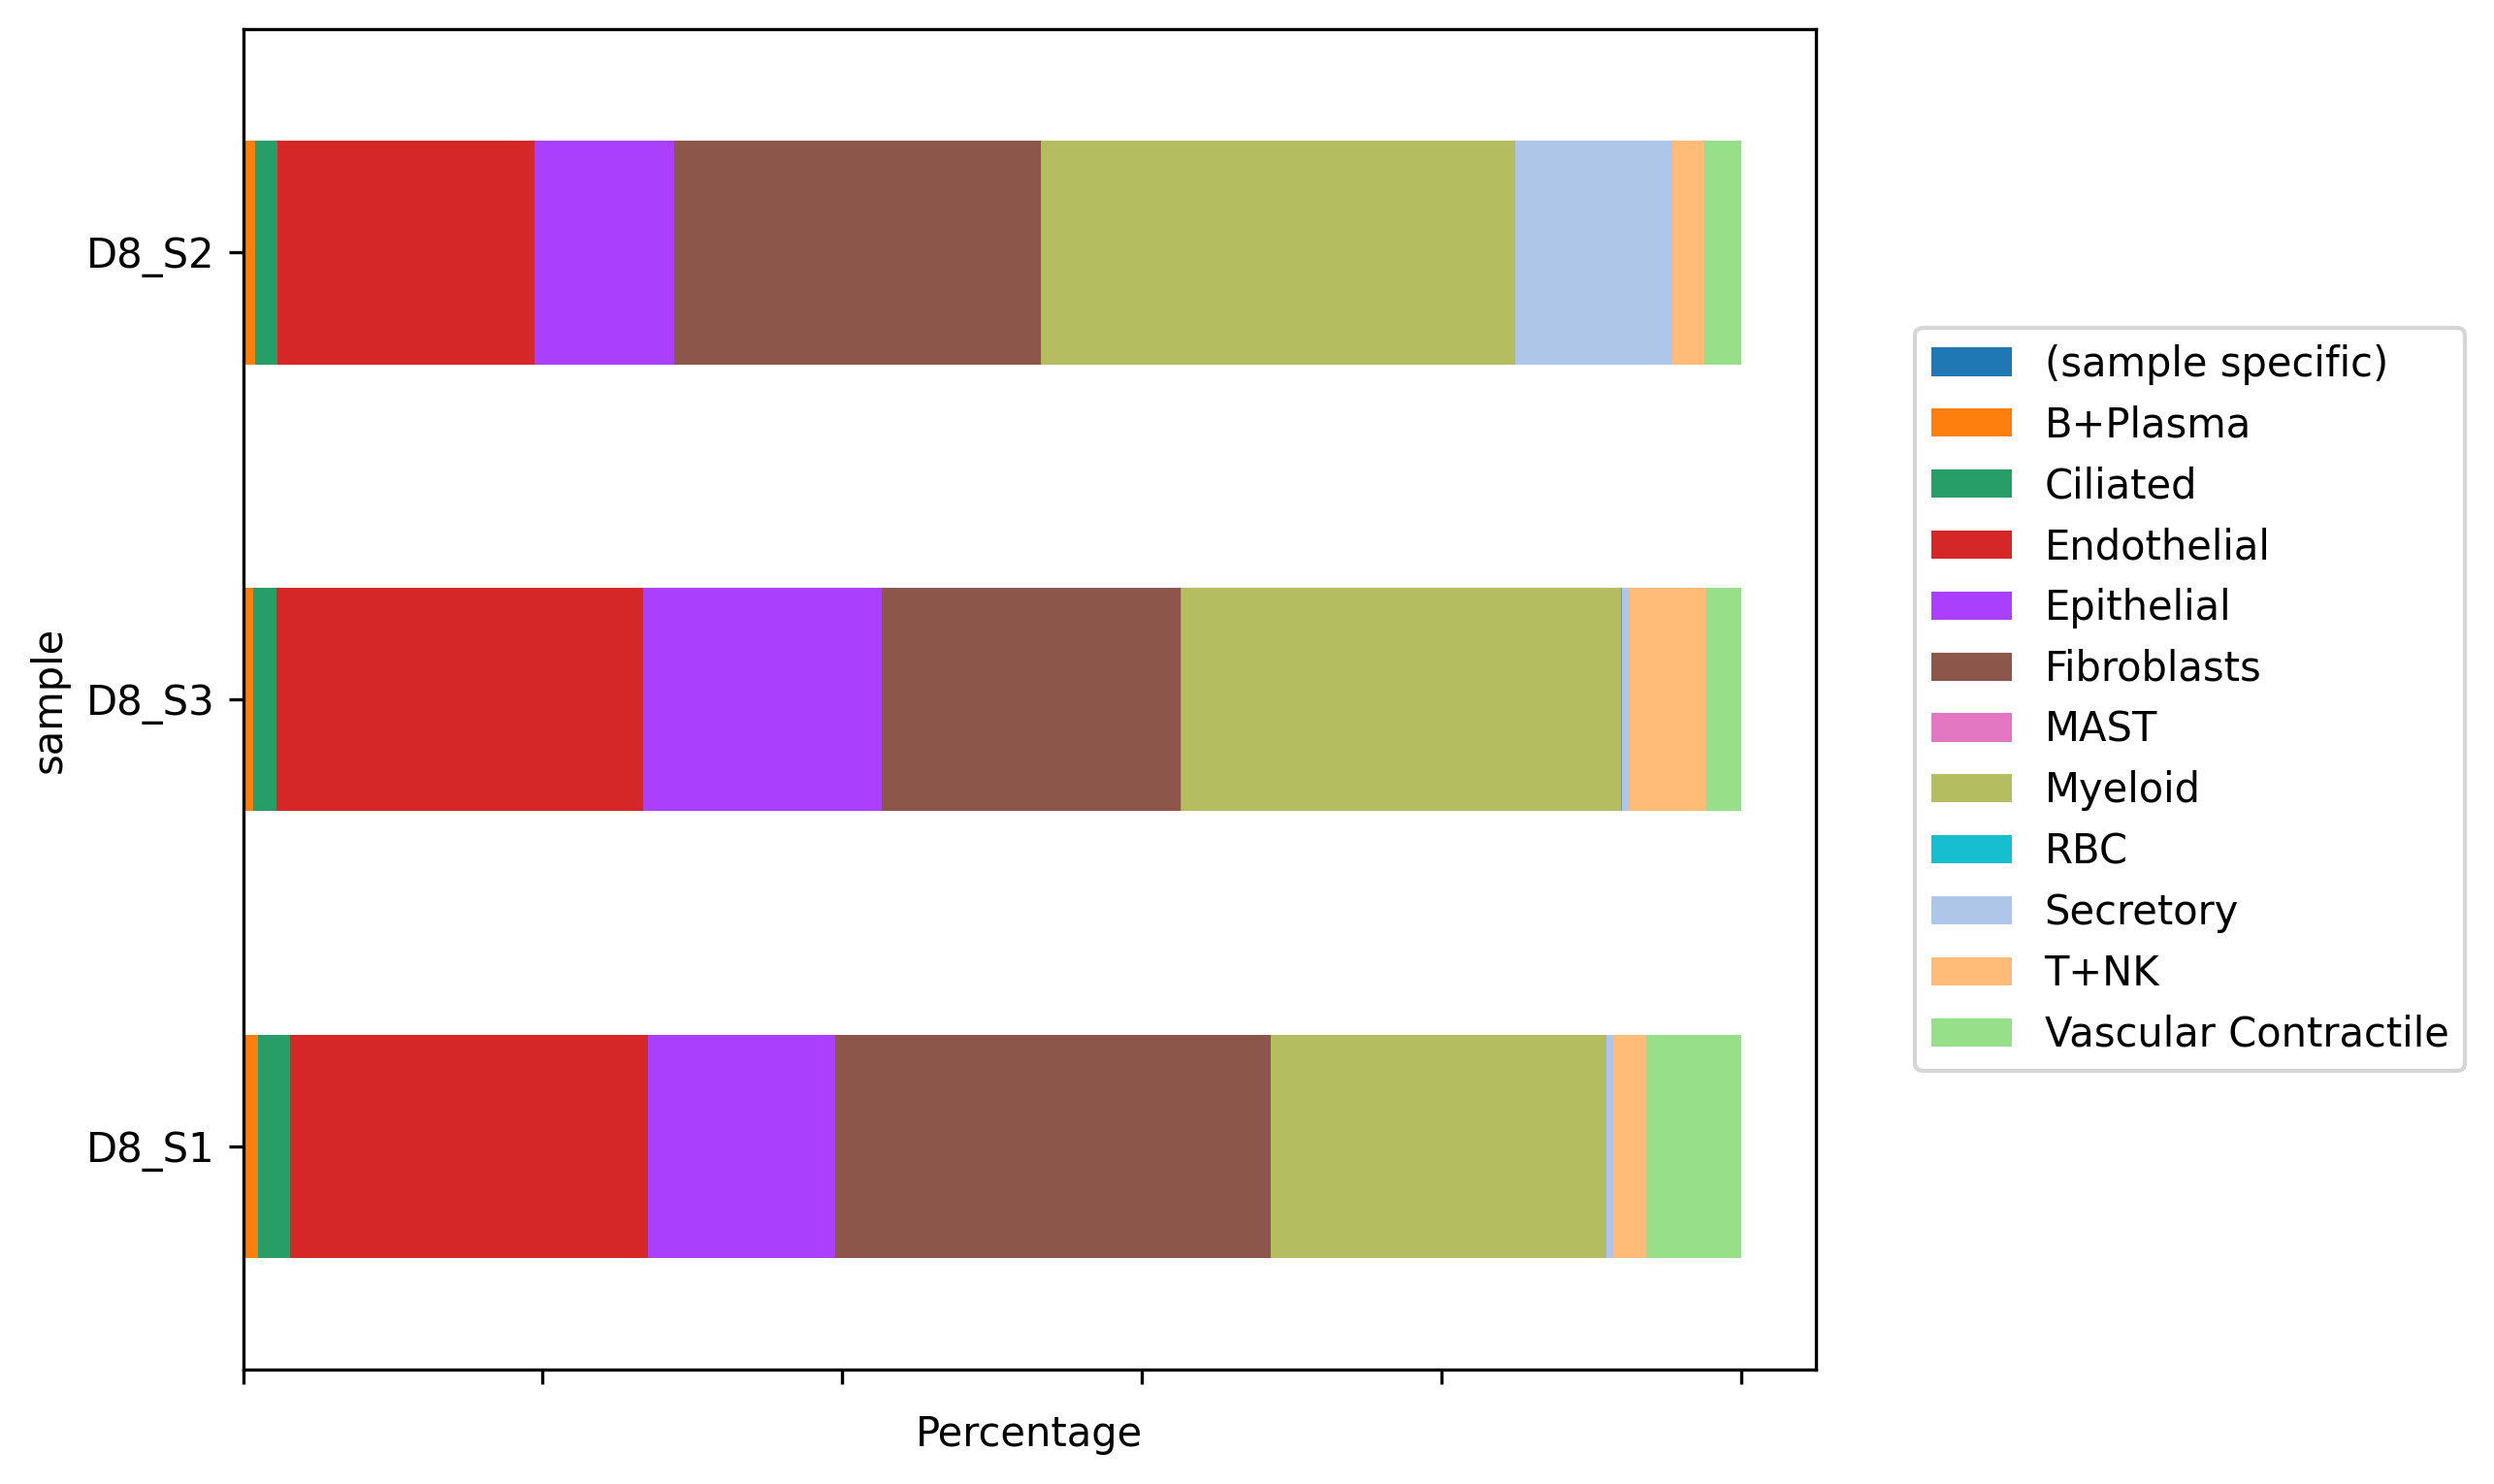

In [11]:
fig4 = pg.compo_plot(data_d8, groupby='sample', condition='Cluster', 
                     sort_function=None, switch_axes=True, 
                     color_unused=True, palette=data.uns['Cluster_colors'], return_fig=True)
plt.tight_layout()
fig4.savefig("ED_Figure_1/ED_Figure_1g.pdf", dpi=300)

In [12]:
data_d8.obs['sample'].value_counts(sort=False)

D8_S2     736
D8_S3    3124
D8_S1    1992
Name: sample, dtype: int64

## Donor D12

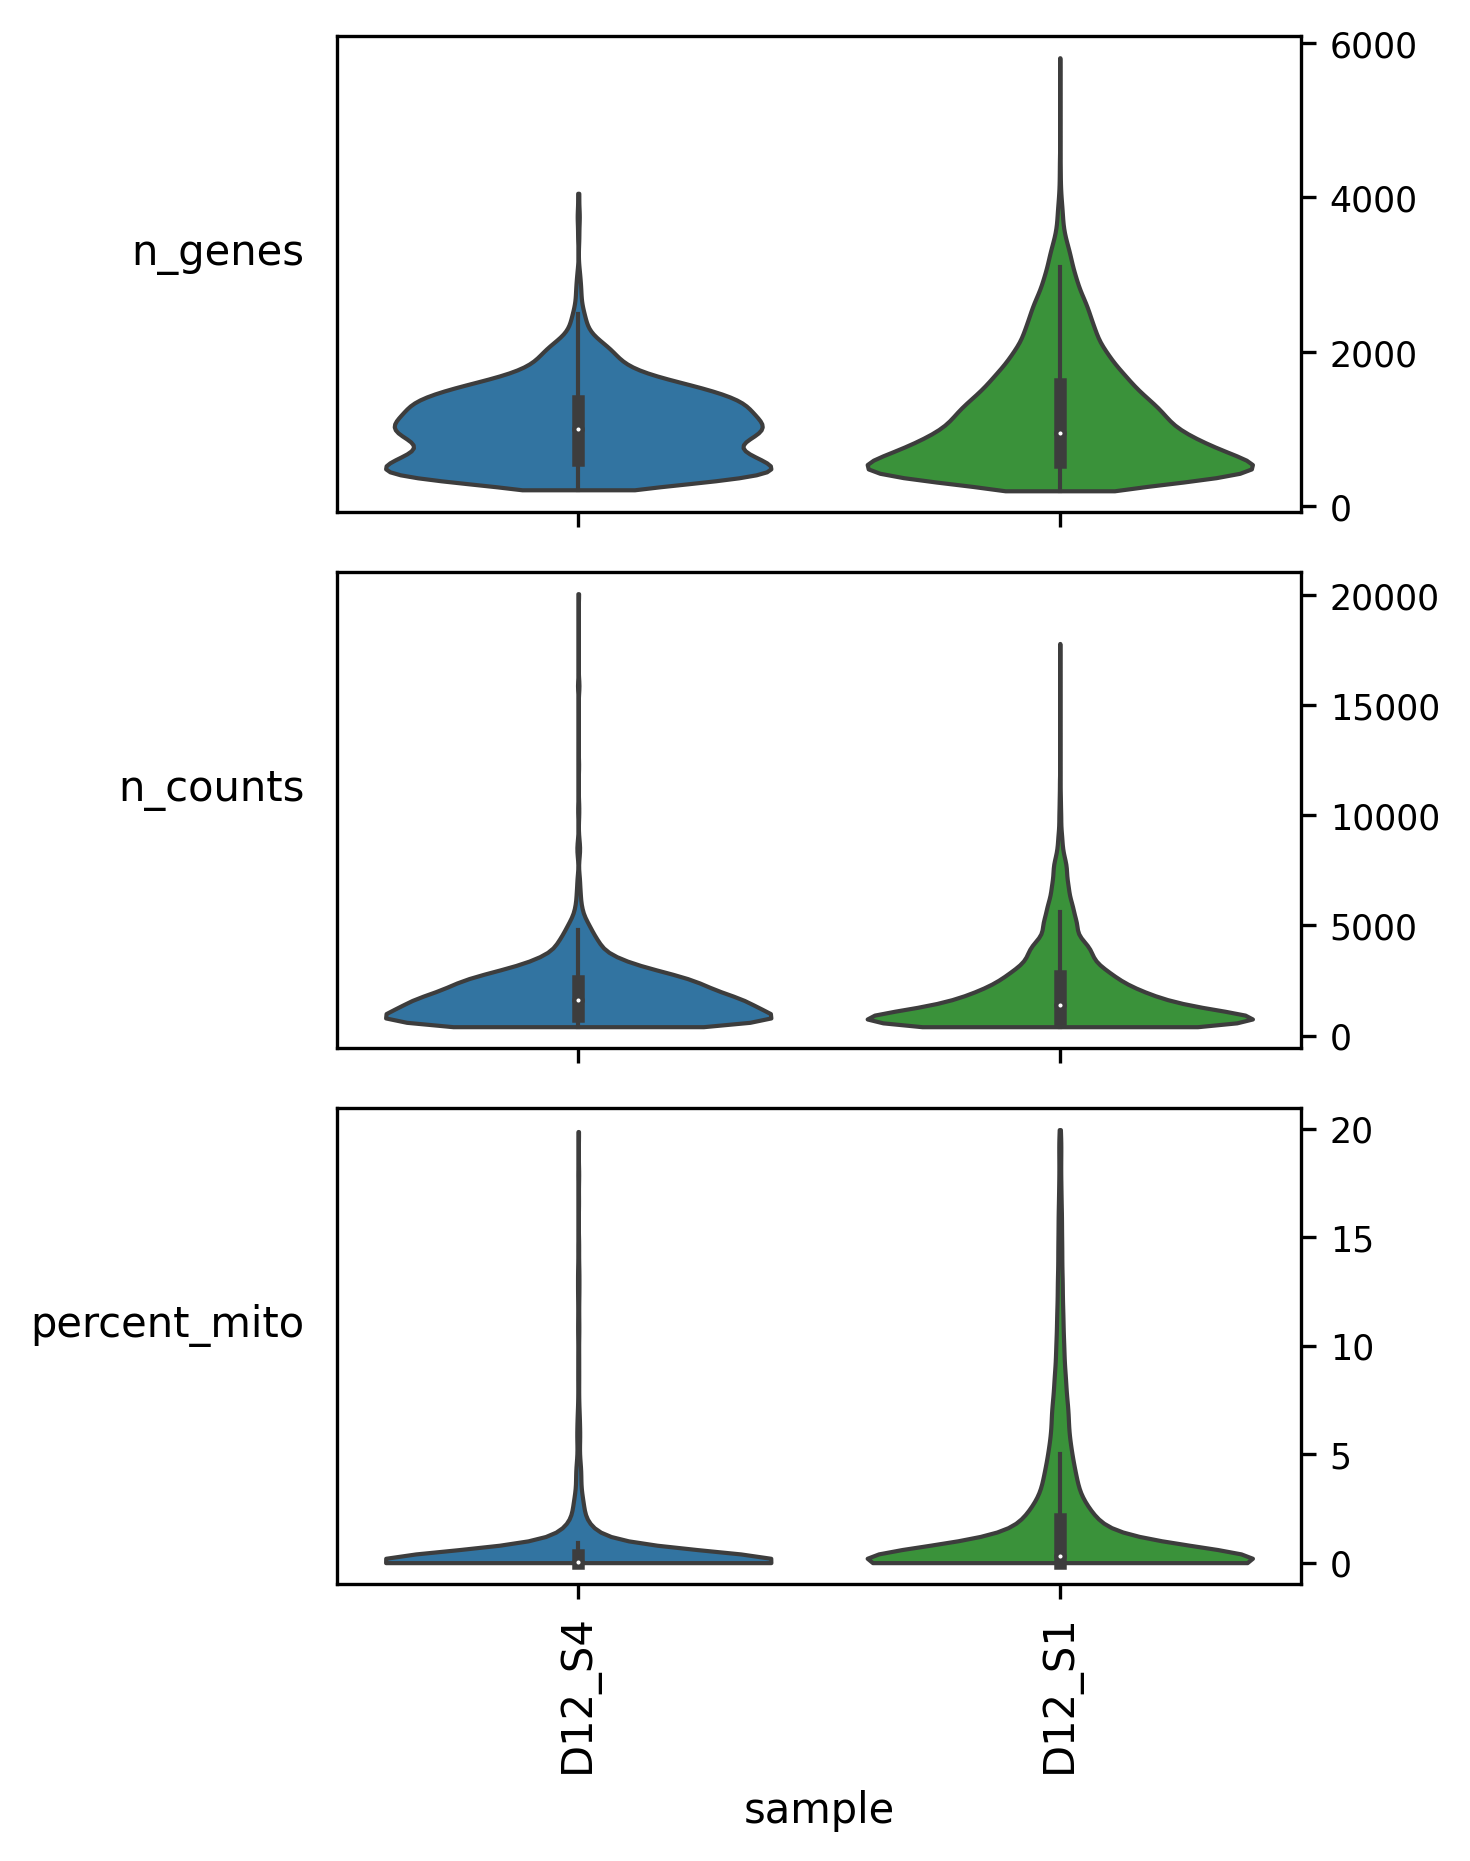

In [13]:
data_d12 = data[data.obs['sample'].isin(sample_dict['D12']), :].copy()
data_d12.obs['sample'] = data_d12.obs['sample'].cat.remove_unused_categories().cat.reorder_categories(sample_dict['D12'])

fig5 = my_violin(data_d12, sample_dict['D12'], palette=[sns.color_palette()[0], sns.color_palette()[2]])
plt.tight_layout()
fig5.savefig("D12_violin.pdf", dpi=300)

In [14]:
data_d12.obs.groupby('sample').median()[['n_genes', 'n_counts', 'percent_mito']]

,n_genes,n_counts,percent_mito
sample,,,
D12_S4,995,1602.5,0.049359
D12_S1,955,1401.0,0.282886


/Users/yy939/GitHub/pegasus/pegasus/plotting/plot_library.py:636: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')


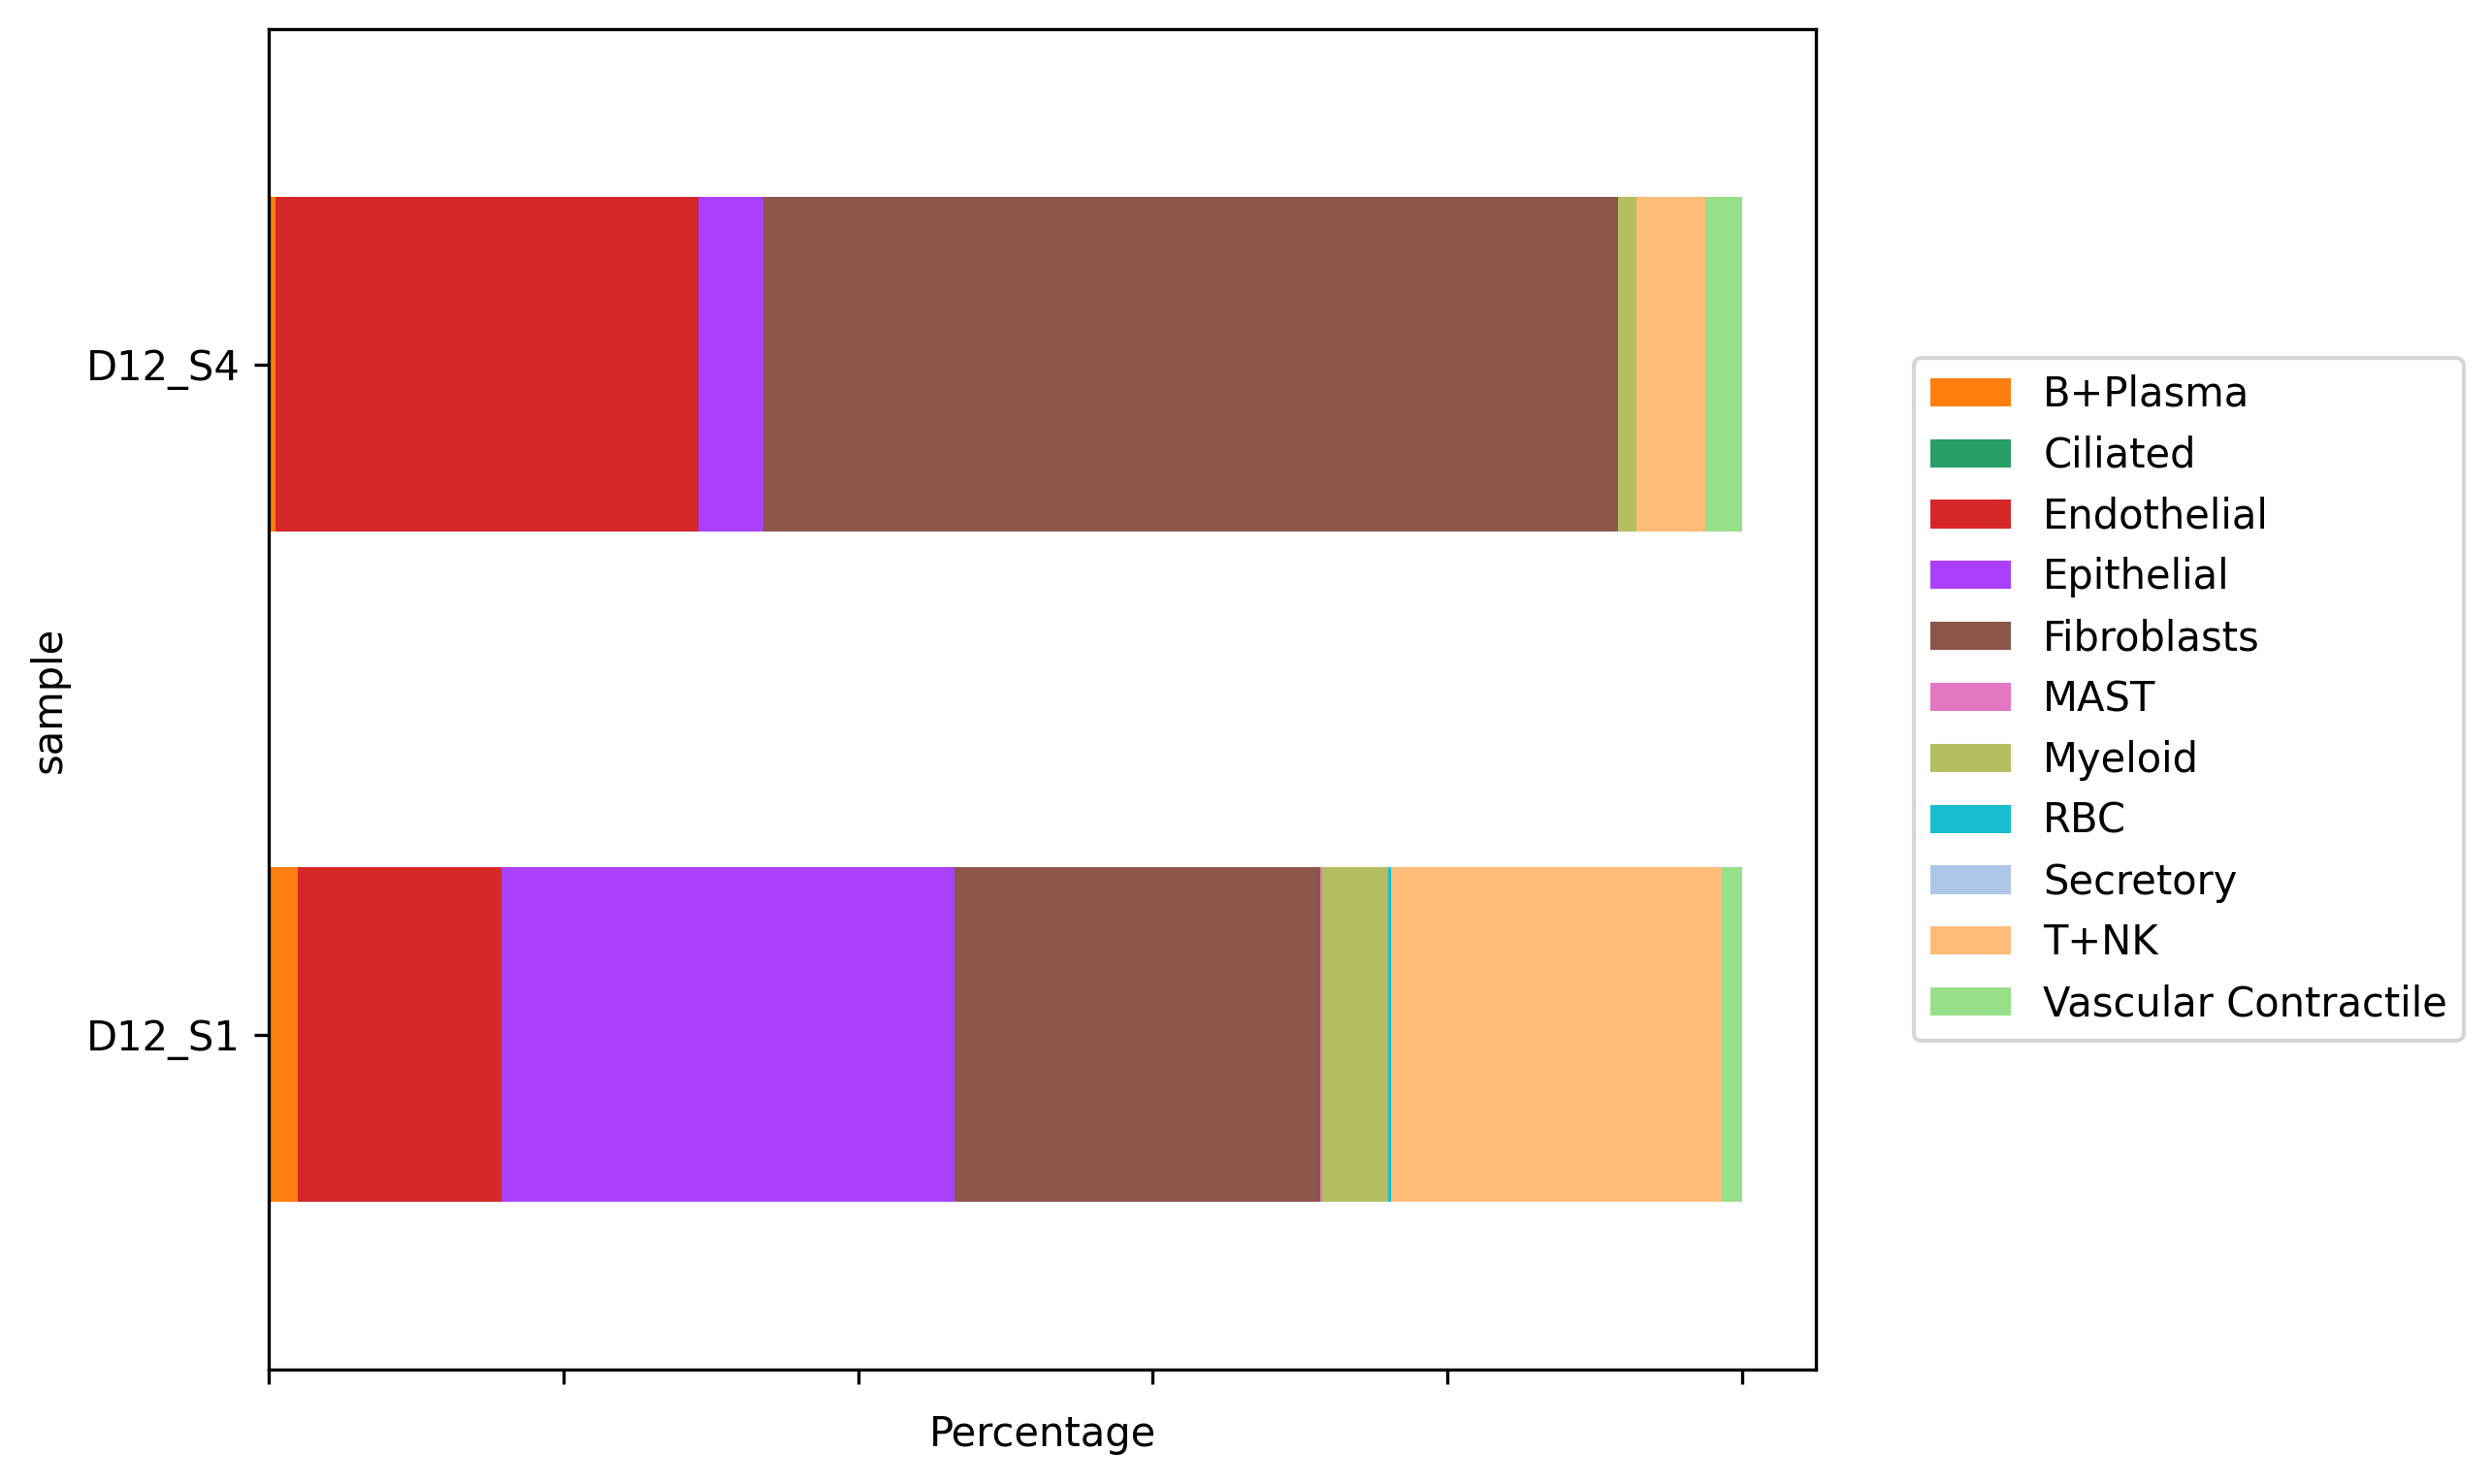

In [15]:
fig6 = pg.compo_plot(data_d12, groupby='sample', condition='Cluster', 
                     sort_function=None, switch_axes=True, 
                     color_unused=True, palette=data.uns['Cluster_colors'], return_fig=True)
plt.tight_layout()
fig6.savefig("ED_Figure_1/ED_Figure_1h.pdf", dpi=300)

In [16]:
data_d12.obs['sample'].value_counts(sort=False)

D12_S4    1786
D12_S1    5240
Name: sample, dtype: int64